## Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings ; warnings.filterwarnings('ignore')

## Read Data

In [2]:
# FeatureSet 불러오기
df_log, hm_log, df_bc, hm_bc = pd.read_pickle('../data/RFMfeatures.pkl')

## Kmeans

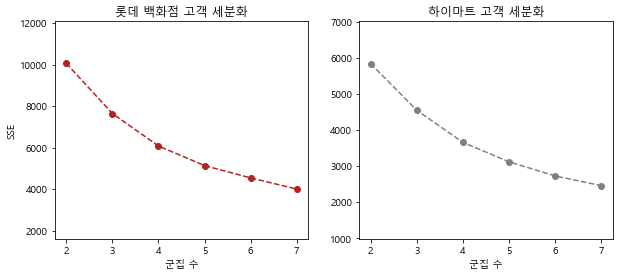

In [3]:
# log 변환한 feature의 군집 수에 따른 SSE(군집내 오차제곱합)를 시각화한다.
# SSE가 완만하게 주는 걸 알 수 있다.
fig, ax = plt.subplots(1,2, figsize=(10,4))

wss = []
for k in range(2,8): 
    kmeans = KMeans(n_clusters=k, random_state=2024)
    kmeans.fit(df_log)
    wss = np.append(wss, kmeans.inertia_)

line = ax[0].plot(np.arange(2,8), wss, color='firebrick', linestyle='--', marker='o', label='SSE')
ax[0].set_title("롯데 백화점 고객 세분화")
ax[0].set_ylim(wss.min()*0.4, wss.max()*1.2)
ax[0].set_xlabel('군집 수')
ax[0].set_ylabel('SSE')

wss = []
for k in range(2,8): 
    kmeans = KMeans(n_clusters=k, random_state=2024)
    kmeans.fit(hm_log)
    wss = np.append(wss, kmeans.inertia_)

line = ax[1].plot(np.arange(2,8), wss, color='gray', linestyle='--', marker='o', label='SSE')
ax[1].set_title("하이마트 고객 세분화")
ax[1].set_ylim(wss.min()*0.4, wss.max()*1.2)
ax[1].set_xlabel('군집 수')
ax[1].set_ylabel('')
plt.show() 

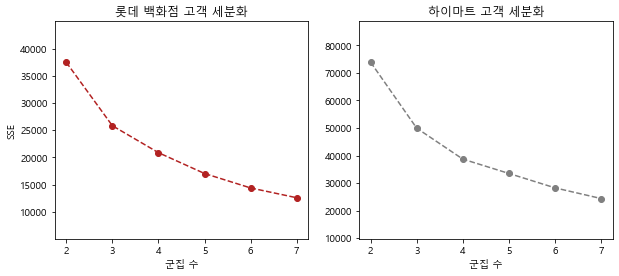

In [4]:
# BoxCox 변환한 feature의 군집 수에 따른 SSE(군집내 오차제곱합)를 시각화한다.
# best k를 3으로 결정할 수 있다.
fig, ax = plt.subplots(1,2, figsize=(10,4))

wss = []
for k in range(2,8): 
    kmeans = KMeans(n_clusters=k, random_state=2024)
    kmeans.fit(df_bc)
    wss = np.append(wss, kmeans.inertia_)

line = ax[0].plot(np.arange(2,8), wss, color='firebrick', linestyle='--', marker='o', label='SSE')
ax[0].set_title("롯데 백화점 고객 세분화")
ax[0].set_ylim(wss.min()*0.4, wss.max()*1.2)
ax[0].set_xlabel('군집 수')
ax[0].set_ylabel('SSE')

wss = []
for k in range(2,8): 
    kmeans = KMeans(n_clusters=k, random_state=2024)
    kmeans.fit(hm_bc)
    wss = np.append(wss, kmeans.inertia_)

line = ax[1].plot(np.arange(2,8), wss, color='gray', linestyle='--', marker='o', label='SSE')
ax[1].set_title("하이마트 고객 세분화")
ax[1].set_ylim(wss.min()*0.4, wss.max()*1.2)
ax[1].set_xlabel('군집 수')
ax[1].set_ylabel('')
plt.show() 

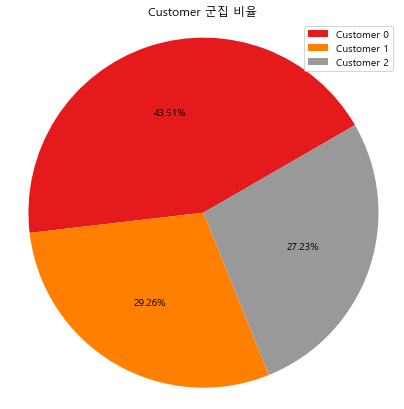

In [5]:
# 백화점 고객 Label을 생성한다.
kmeans = KMeans(n_clusters=3, random_state=2024) 
kmeans.fit(df_bc)
df_bc['segment'] = kmeans.labels_

plt.figure(figsize=(7,7))
plt.pie(df_bc.segment.value_counts(), autopct='%.2f%%', startangle=30, colors=['#e41a1c','#ff7f00','#999999'])
plt.title("Customer 군집 비율")
plt.axis('equal')
plt.legend(labels=['Customer 0', 'Customer 1', 'Customer 2'])
plt.show() 

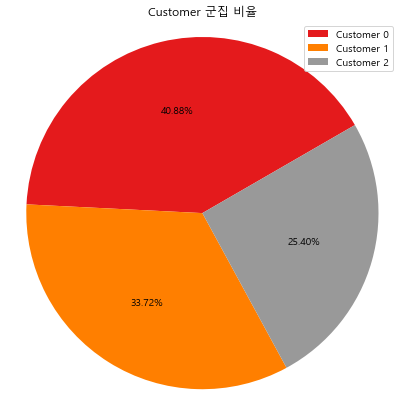

In [6]:
# 하이마트 고객 Label을 생성한다.
kmeans = KMeans(n_clusters=3, random_state=2024) 
kmeans.fit(hm_bc)
hm_bc['segment'] = kmeans.labels_

plt.figure(figsize=(7,7))
plt.pie(hm_bc.segment.value_counts(), autopct='%.2f%%', startangle=30, colors=['#e41a1c','#ff7f00','#999999'])
plt.title("Customer 군집 비율")
plt.axis('equal')
plt.legend(labels=['Customer 0', 'Customer 1', 'Customer 2'])
plt.show() 

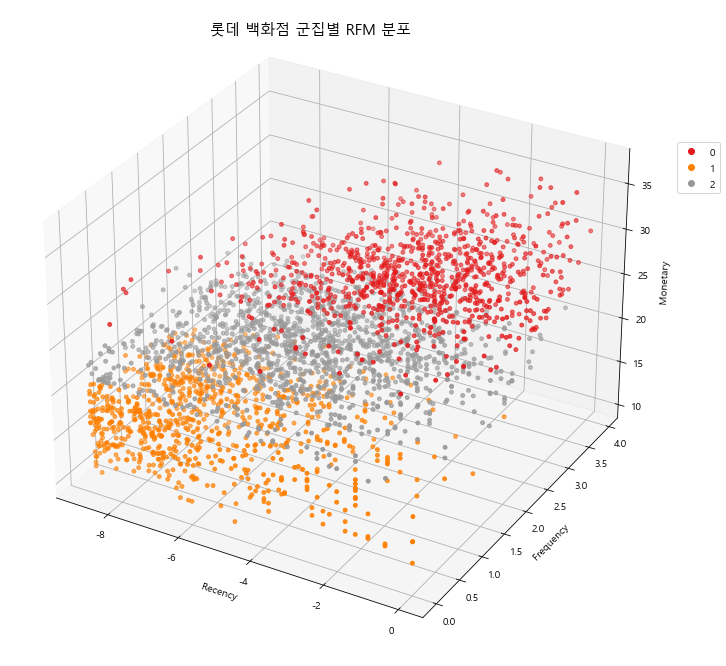

In [7]:
# 3차원으로도 시각화해본다.
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
sc = ax.scatter3D(df_bc.recency, df_bc.frequency,df_bc.monetary, c=df_bc.segment, marker='o', s=15, cmap='Set1')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.text(-5.5, 0.2, 60, "롯데 백화점 군집별 RFM 분포", fontdict={'fontsize':15})
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.1, 0.8))
plt.show()

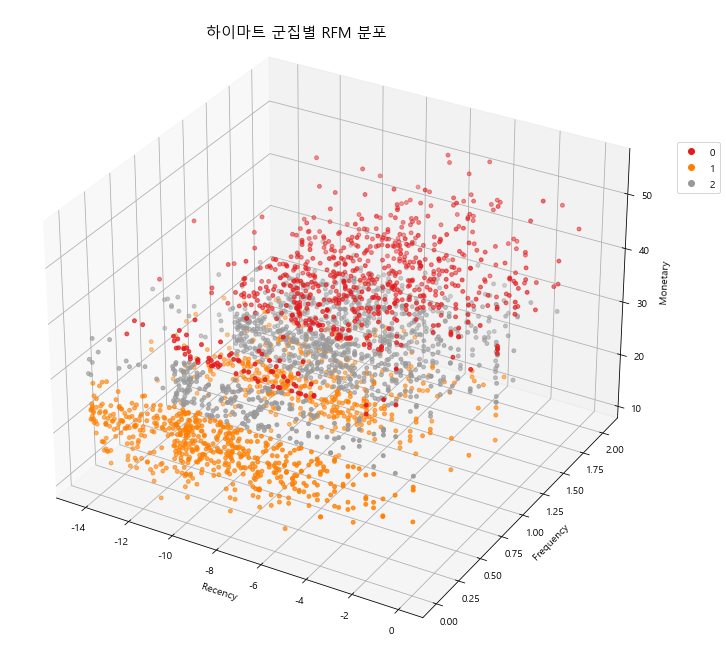

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')
sc = ax.scatter3D(hm_bc.recency, hm_bc.frequency,hm_bc.monetary, c=hm_bc.segment, marker='o', s=15, cmap='Set1')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.text(-14, 1.2, 75, "하이마트 군집별 RFM 분포", fontdict={'fontsize':15})
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.1, 0.8))
plt.show()

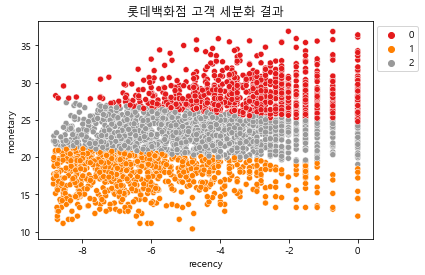

In [9]:
# 하이마트는 monetary 중심으로 나뉘었음을 알 수 있다.
sns.scatterplot(data=df_bc, x='recency', y='monetary', hue='segment', palette=['#e41a1c','#ff7f00','#999999'])
plt.title("롯데백화점 고객 세분화 결과")
plt.legend(bbox_to_anchor=(1.15,1))
plt.show()

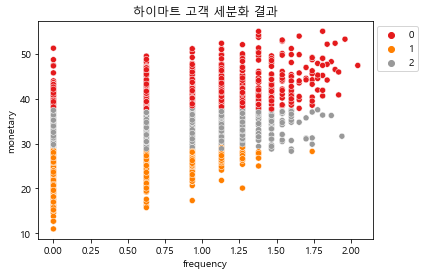

In [10]:
# 하이마트는 monetary 중심으로 나뉘었음을 알 수 있다.
sns.scatterplot(data=hm_bc, x='frequency', y='monetary', hue='segment', palette=['#e41a1c','#ff7f00','#999999'])
plt.title("하이마트 고객 세분화 결과")
plt.legend(bbox_to_anchor=(1.15,1))
plt.show()

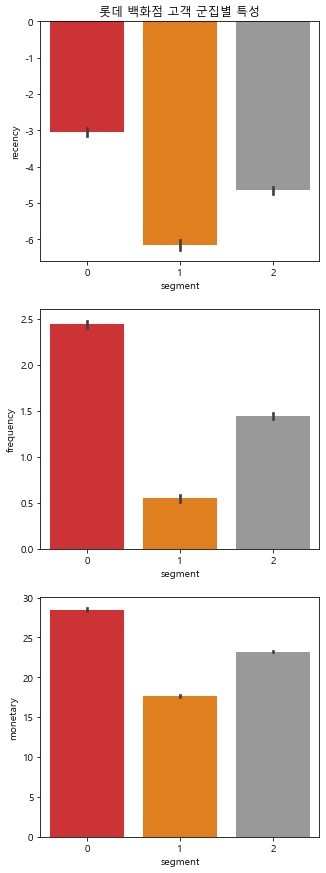

In [11]:
fig, ax = plt.subplots(3,1, figsize=(5,15))
sns.barplot(data=df_bc, x='segment', y='recency', palette=['#e41a1c','#ff7f00','#999999'], ax=ax[0])
ax[0].set_title("롯데 백화점 고객 군집별 특성")
sns.barplot(data=df_bc, x='segment', y='frequency', palette=['#e41a1c','#ff7f00','#999999'], ax=ax[1])
sns.barplot(data=df_bc, x='segment', y='monetary', palette=['#e41a1c','#ff7f00','#999999'], ax=ax[2])
plt.show()

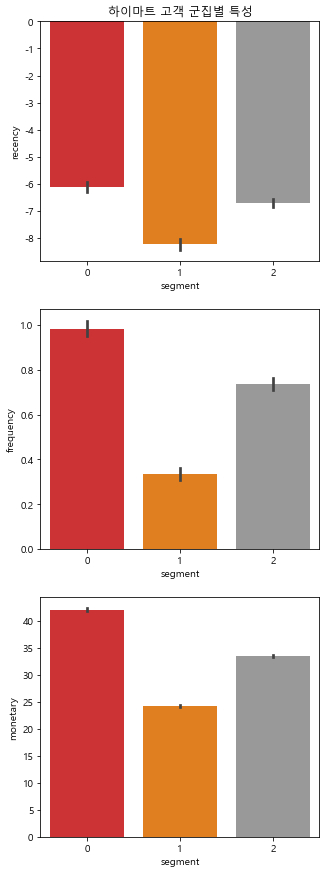

In [12]:
fig, ax = plt.subplots(3,1, figsize=(5,15))
sns.barplot(data=hm_bc, x='segment', y='recency', palette=['#e41a1c','#ff7f00','#999999'], ax=ax[0])
ax[0].set_title("하이마트 고객 군집별 특성")
sns.barplot(data=hm_bc, x='segment', y='frequency', palette=['#e41a1c','#ff7f00','#999999'], ax=ax[1])
sns.barplot(data=hm_bc, x='segment', y='monetary', palette=['#e41a1c','#ff7f00','#999999'], ax=ax[2])
plt.show()

## Save data

In [13]:
df_bc.to_csv('../data/백화점_고객세분화.csv')
hm_bc.to_csv('../data/하이마트_고객세분화.csv')